In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
project_path = os.path.dirname(os.getcwd())
dataset_path = os.path.join(project_path, 'datasets')
file_name = 'preprocessed_dataset_with_lyrics.csv'

In [3]:
df = pd.read_csv(os.path.join(dataset_path, file_name), index_col=0)

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head(5))

,song_id_from_src,dataset,title,artist,genre,arousal_mean,arousal_std,valence_mean,valence_std,emotion_4Q,emotion_2Q,lyrics,language,lyrics_without_brackets,general_genre
0,1,PMEmo2019,Good Drank,2 Chainz,NaN,0.4000,0.156125,0.575,0.160078,relaxed,positive,"[Intro: 2 Chainz] Uhh, alright I did it, hahah...",en,"Uhh, alright I did it, hahah, yeah Used to tre...",NaN
2,5,PMEmo2019,No Heart,21 Savage,NaN,0.1500,0.175000,0.200,0.203101,sad,negative,"[Intro] Southside, Southside on the, Southside...",en,"Southside, Southside on the, Southside on the,...",NaN
3,6,PMEmo2019,Red Opps,21 Savage,NaN,0.5125,0.171847,0.350,0.200000,angry,negative,"[Intro] Yeah, yeah, yeah I pull up roll the wi...",en,"Yeah, yeah, yeah I pull up roll the window dow...",NaN
4,7,PMEmo2019,Girls Talk Boys,5 Seconds Of Summer,NaN,0.7000,0.139194,0.725,0.122474,happy,positive,"[Intro: All] When the girls, when the girls ta...",en,"When the girls, when the girls talk When the g...",NaN
5,8,PMEmo2019,PRBLMS,6LACK,NaN,0.3875,0.246539,0.225,0.175000,sad,negative,"[Intro] Yeah, yeah Yeah, yeah Yeah, yeah Alrig...",en,"Yeah, yeah Yeah, yeah Yeah, yeah Alright And s...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2629 entries, 0 to 3510
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   song_id_from_src         2629 non-null   object 
 1   dataset                  2629 non-null   object 
 2   title                    2629 non-null   object 
 3   artist                   2629 non-null   object 
 4   genre                    1532 non-null   object 
 5   arousal_mean             770 non-null    float64
 6   arousal_std              770 non-null    float64
 7   valence_mean             770 non-null    float64
 8   valence_std              770 non-null    float64
 9   emotion_4Q               2629 non-null   object 
 10  emotion_2Q               2629 non-null   object 
 11  lyrics                   2629 non-null   object 
 12  language                 2629 non-null   object 
 13  lyrics_without_brackets  2629 non-null   object 
 14  general_genre           

In [6]:
df.isna().sum()

song_id_from_src              0
dataset                       0
title                         0
artist                        0
genre                      1097
arousal_mean               1859
arousal_std                1859
valence_mean               1859
valence_std                1859
emotion_4Q                    0
emotion_2Q                    0
lyrics                        0
language                      0
lyrics_without_brackets       0
general_genre              1131
dtype: int64

Text(0.5, 0, 'Lyrics length')

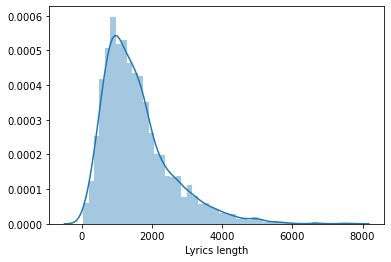

In [7]:
sns.distplot(df['lyrics'].str.len())
plt.xlabel('Lyrics length')

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

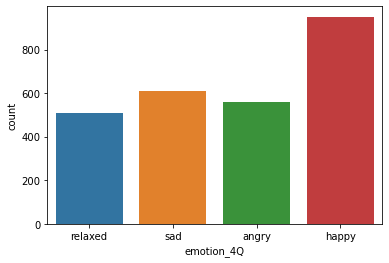

In [8]:
sns.countplot(x="emotion_4Q", data=df)

<AxesSubplot:xlabel='emotion_2Q', ylabel='count'>

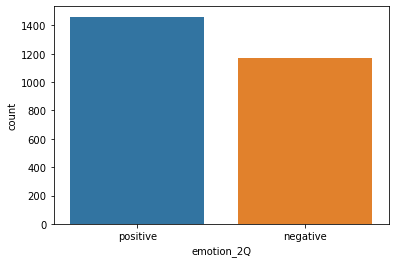

In [9]:
sns.countplot(x="emotion_2Q", data=df)

<AxesSubplot:xlabel='dataset', ylabel='count'>

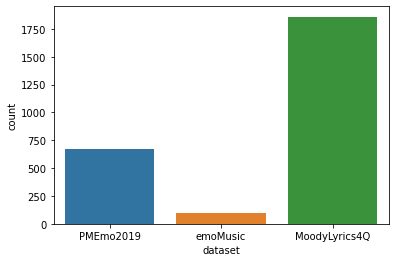

In [10]:
sns.countplot(x="dataset", data=df)

In [11]:
with pd.option_context('display.max_rows', None):
    display(df.genre.value_counts(dropna=False))

NaN                    1097
Pop                     182
Alternative Rock        143
Rock                    117
Hip-Hop                  91
Indie                    87
Thrash Metal             69
Metal                    51
Country                  49
Folk                     43
Electronic               40
Jazz                     38
R&B                      37
Soul                     36
Pop-Rock                 28
Heavy Metal              24
Alternative Metal        24
Rap Metal                21
Industrial Metal         20
Hard Rock                19
Progressive Metal        18
Punk Rock                17
New Wave                 16
Progressive Rock         15
House                    15
Psychedelic Rock         15
Synthpop                 13
New Age                  13
Blues                    13
Nu Metal                 13
Doom Metal               12
Funk                     12
Acoustic                 11
Post-Hardcore            10
Ambient                  10
Ska                 

In [12]:
with pd.option_context('display.max_rows', None):
    display(df.general_genre.value_counts(dropna=False))

NaN           1131
Rock           464
Pop            349
Metal          303
Hip-Hop        105
Country         95
Electronic      92
Jazz            90
Name: general_genre, dtype: int64

<AxesSubplot:xlabel='general_genre', ylabel='count'>

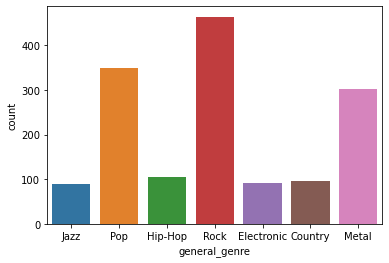

In [13]:
sns.countplot(x="general_genre", data=df)

Text(0, 0.5, 'arousal')

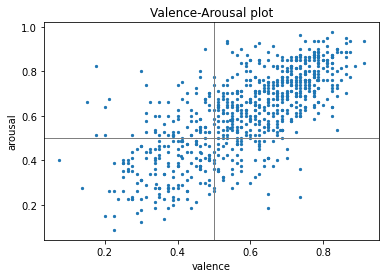

In [14]:
plt.scatter(df.valence_mean.values, df.arousal_mean.values, s=5)
plt.title('Valence-Arousal plot')
plt.axhline(0.5, color='grey', lw=1)
plt.axvline(0.5, color='grey', lw=1)
plt.xlabel('valence')
plt.ylabel('arousal')